## Prediction Using Supervised ML
### Predicting the score of a student based on the study hours

### BY: Rahul Kumar Sethi
### National Institute of Technology-Rourkela

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Here I've imported the data from the link, it can be also done by downloading it and importing from the local device as a csv file.

In [46]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)

print("Imported Data")
print("The first 5 values in our data are:")
data.head()

Imported Data
The first 5 values in our data are:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Plotting our data points to recognize any relationship between the data.

Text(0.5, 1.0, 'Hours vs Precentage')

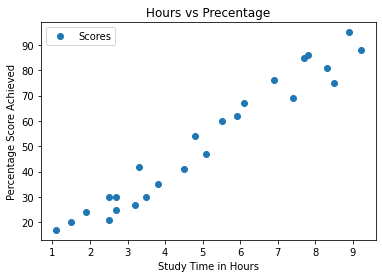

In [5]:
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Study Time in Hours')
plt.ylabel('Percentage Score Achieved')
plt.title('Hours vs Precentage')

#### The graph shows that there exists a linear relationship between the variables, that is, Hours and Scores are related to each other by a linear relation.

#### Checking for any missing values or other anomaly in the data

In [51]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### The data does not have any missing values or any other anomaly.

#### Now, we divide the data into imputs and outputs (attributes and labels)

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Now, dividing the data into training sets and test sets, using Scikit-Learn's train_test_split() method.
#### Data divisioin: 80% - Training Data,  20% - Test Data

In [10]:
from sklearn.model_selection import train_test_split
x_train_set,x_test_set,y_train_set,y_test_set=train_test_split(x,y,test_size=0.2,random_state=0)

#### Importing Linear Regression Model from Scikit-Learn and training the model using the training data set

In [11]:
from sklearn.linear_model import LinearRegression
Model=LinearRegression()
Model.fit(x_train_set,y_train_set)

LinearRegression()

#### Plotting the regression line and data points

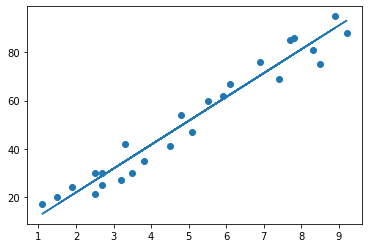

In [53]:
# Plotting regression line
RegLine=Model.coef_*x + Model.intercept_
# Plotting data points
plt.scatter(x,y)
plt.plot(x,Line)
plt.show()

#### The coefficient & intercept of the regression line

In [61]:
print("Coefficient of regression line is:")
Model.coef_[0]

Coefficient of regression line is:


9.910656480642237

In [60]:
print("Intercept of the regression line is:")
Model.intercept_

Intercept of the regression line is:


2.018160041434683

#### Predicting the scores from hours in test data set

In [14]:
print(x_test_set)
y_predict=Model.predict(x_test_set)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Table showing the actual values from the data vs the predicted values from our model

In [15]:
DF=pd.DataFrame({'Actual Values':y_test_set,'Predicted Values':y_predict})
DF

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Testing with the data given in problem statement

In [17]:
Hour=np.array([9.25])
Hour=Hour.reshape(-1,1)
Problem_Prediction=Model.predict(Hour)

In [27]:
print("Study Time in Hours = {}".format(Hour[0][0]))
print("Predicted Score Based on Study Hours = {} ".format(Problem_Prediction[0]))

Study Time in Hours = 9.25
Predicted Score Based on Study Hours = 93.69173248737538 


In [62]:
from sklearn import metrics

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test_set,y_predict))

print("R2 score:",metrics.r2_score(y_test_set,y_predict))

Mean Absolute Error: 4.183859899002975
R2 score: 0.9454906892105356


#### This shows how well our model performed. Here I've chosen Mean Absolute Error & R2 score. The lower the Mean Absolute Error, the better the model, whereas for R2 score, higher value denotes better model. 
#### Here, Mean Absolute Error is 4.18, which is pretty low and R2 score is 0.945, which denotes that the Linear Regression model works well.